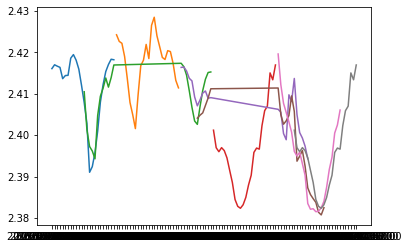

In [2]:
import pandas as pd
import numpy as np
import csv
import math
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join

%matplotlib inline

files = [f for f in listdir("./") if (isfile(join("./", f)) and f.endswith(".csv"))]

fig = plt.figure()
ax = fig.add_subplot()

stacja = "WROC"

data = []
ZTD = {}

def interpoluj(p_i, t_i, h, h_i, fi):
    gamma = 0.0065
    R = 8.31432
    M = 0.289644
    g = 9.8063*(1-(10**-7)*((h_i+h)/2)*(1-0.0026373*math.cos(2*fi)+5.9*(10**-6)*(math.cos(2*fi)**2)))
    p = p_i * ((t_i - gamma*(h-h_i))/t_i)**((g*M)/(R*gamma))

    return str(p)

def oblicz_ztd(nazwa):
    ZTD = {}
    with open(nazwa, newline='') as csvfile:
            reader = csv.reader(csvfile)
            for row in reader:
                if row[2] == stacja:
                    if (row[3]=='2m'):
                        row[12] = interpoluj(float(row[12]), float(row[10]), float(row[8]), float(row[9]), float(row[4]))
                    data.append(row)
                    e_sat = 6.112*math.exp((17.67*(float(row[10])-273.15))/((float(row[10])-273.15)+243.5))
                    e = float(row[11])*e_sat/100
                    va = 0.002277*(float(row[12])+((1255/float(row[10]))+0.05)*e)
                    ZTD[row[0]+" "+row[1]]=va                    
            return ZTD
        
for f in files:

    D = oblicz_ztd(f)

    dates = list(D.keys())
    ZTDs = list(D.values())
    ax.plot(dates, ZTDs, '-')